Ejercicios de exploración

1. Modifica el conjunto de datos agregando más instancias con comentarios de películas y etiquetas de sentimientos.
2. Experimenta con diferentes técnicas de preprocesamiento de texto, como eliminación de stopwords o lematización, y observa cómo afecta la precisión del clasificador.
3. Prueba otros algoritmos de clasificación disponibles en NLTK, como clasificador de árboles de decisión o clasificador de máquinas de vectores de soporte (SVM), ycompara sus resultados con el clasificador Naive Bayes.
4. Crea una función para calcular métricas adicionales de evaluación del clasificador, como precisión, recall y F1-score, y aplícala al modelo entrenado.
5. Experimenta con la clasificación de nuevos textos ingresados manualmente y observa cómo el clasificador etiqueta diferentes comentarios de películas.

In [2]:
import nltk
import random

# 1. Modifica el conjunto de datos agregando más instancias con comentarios de películas y etiquetas de sentimientos.  Find dataset of review of movies
# se trae el dataset de Sentiment Analysis consists of 50000 comments. There are 25000 negative and 25000 positive comments. Comments are of different lengths and are given in sentences.
# origen https://www.kaggle.com/code/rafetcan/sentiment-analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")
import os
import csv # Import the csv module

import nltk
import random

# 1. Modifica el conjunto de datos agregando más instancias con comentarios de películas y etiquetas de sentimientos.  Find dataset of review of movies
# se trae el dataset de Sentiment Analysis consists of 50000 comments. There are 25000 negative and 25000 positive comments. Comments are of different lengths and are given in sentences.
# origen https://www.kaggle.com/code/rafetcan/sentiment-analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")
import os
import csv # Import the csv module

# Use 'on_bad_lines' instead of 'error_bad_lines' to handle bad lines
nuevos_datos = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines='skip') # Skip bad lines
nuevos_datos.head()
nuevos_datos.columns
print(nuevos_datos.sentiment.value_counts())
print(nuevos_datos[:10])

data = []
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the caracters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how I enjoyed this flim", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The perfomances by the actors were lackluster", "negative"),
    ("I was on the edge of my seat the whole time", "positive"),
    ("Although the premise was intriguing, the plot was a little hard to follow", "negative"),
    ("The completely implausible twist at the end ruined it", "negative"),
    ("It’s the feel-good movie of the year", "positive"),
    ("I found it very touching", "positive"),
    ("To be honest, I liked the remake better than the original", "positive"),
    ("The movie was enjoyable", "positive"),
    ("This movie was intriguing", "positive"),
    ("The movie was boring", "negative"),
    ("This movie is powerful", "positive"),
    ("This movie is not good", "negative"),
    ("This movie is amazing", "positive"),
    ("This movie is awful", "negative"),
    ("This movie is terrific", "positive"),
    ("I don't undesrtand this movie", "negative"),
    ("This film is beautiful", "positive"),
    ("This movie haven't good", "negative"),
    ("This film is really basic", "negative"),
    ("This movie isn't real", "negative"),
    ("This movie is false", "negative")
    ]

# Concatenar los datos
data_combinado = pd.concat([pd.DataFrame(data, columns=['review', 'sentiment']), nuevos_datos], ignore_index=True)
data_combinado.head()
print(data_combinado.sentiment.value_counts())
print(data_combinado[:10])

for _, row in nuevos_datos.iterrows():
    data.append((row['review'], row['sentiment']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


sentiment
positive    25000
negative    25000
Name: count, dtype: int64
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive
sentiment
positive    25021
negative    25021
Name: count, dtype: int64
                                   review sentiment
0                       I love this movie  positive
1                  This movie is terrible  negative
2      

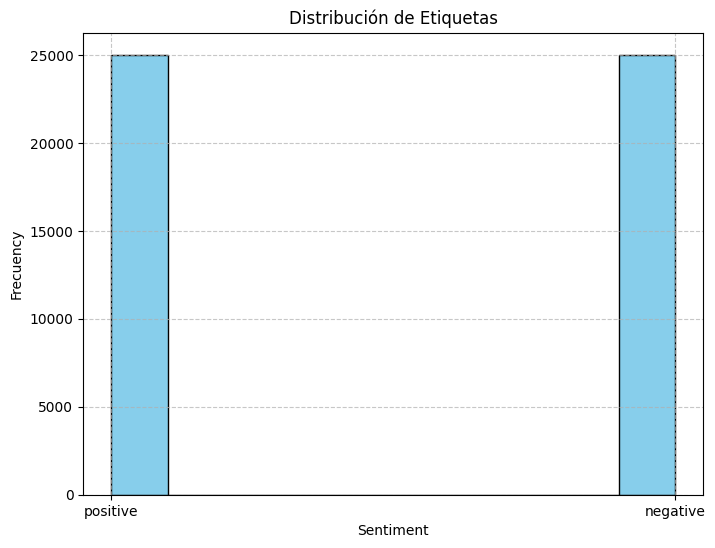

In [ ]:
import matplotlib.pyplot as plt
# Revisar el histograma
labels = [label for (review, label) in data]
plt.figure(figsize=(8, 6))
plt.hist(labels, color='skyblue', edgecolor='black')  # Añade color y borde
plt.xlabel('Sentiment')
plt.ylabel('Frecuency')
plt.title('Distribución de Etiquetas')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla
plt.show()

[('the', 638886), ('a', 316616), ('and', 313641), ('of', 286666), ('to', 264576), ('is', 204888), ('in', 179811), ('i', 141600), ('this', 138511), ('that', 130140), ('it', 129616), ('/><br', 100974), ('was', 93270), ('as', 88242), ('with', 84590), ('for', 84511), ('but', 77864), ('on', 62892), ('movie', 61517), ('are', 57009)]


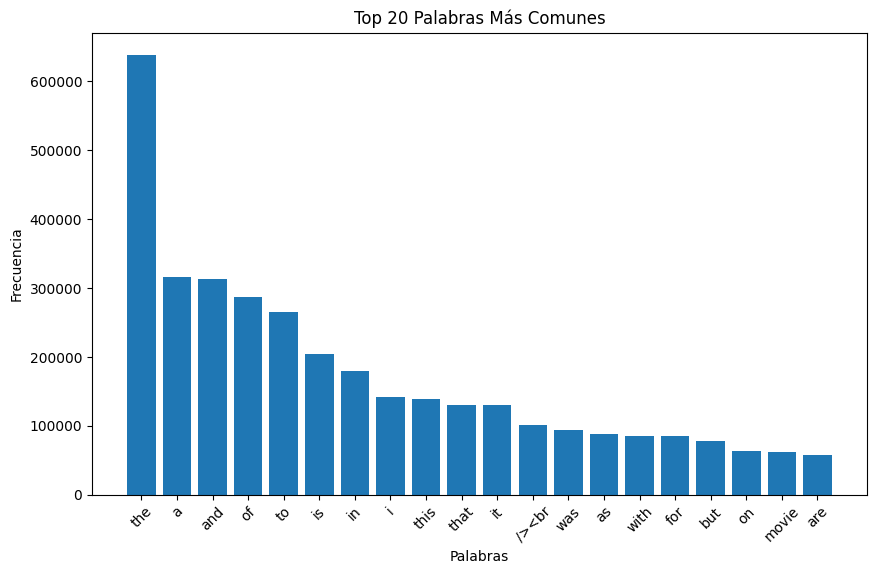

In [ ]:
# Histograma de palabras
from collections import Counter

# Extraer todas las palabras
all_words = []
for text, _ in data:
    all_words.extend(text.lower().split())

# Contar frecuencia de palabras
word_counts = Counter(all_words)

# Obtener las 20 palabras más comunes
top_20_words = word_counts.most_common(20)
print(top_20_words)
# Crear un gráfico de barras
words, counts = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 20 Palabras Más Comunes')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# !pip install nltk==3.8.1
import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download the 'punkt' resource

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

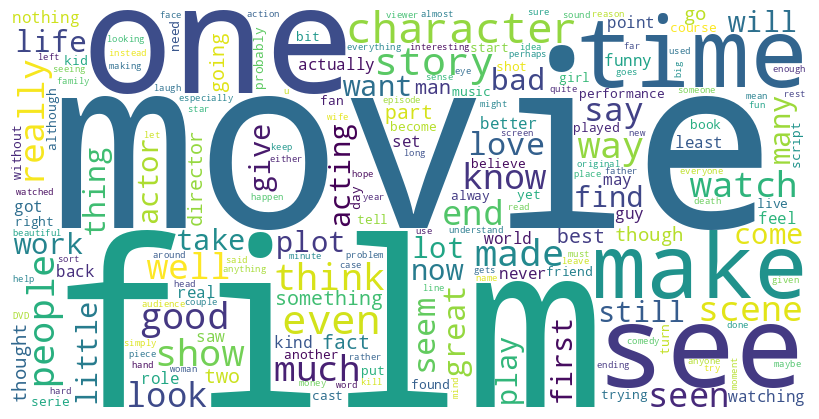

In [ ]:
#!pip install wordcloud matplotlib
# Preprocesamiento de datos con stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords # import the stopwords module
from nltk.tokenize import word_tokenize # import the word_tokenize function

def remove_stopwords(text):
  stop_words = set(stopwords.words('english')) # use the stopwords module to get stop words
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
  return ' '.join(filtered_text)


# Une todas las frases en un solo texto
texto = " ".join([item[0] for item in data])
data
# Define las palabras que quieres ignorar (stopwords)
stopwords_wc = set(STOPWORDS) # rename this variable to avoid overwriting the stopwords module
stopwords_wc.update(["/><br", "the", "a", "and", "of", "to", "br"])  # Agrega palabras adicionales si es necesario

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords_wc).generate(texto)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Aplicamos el procesamiento a los datos
featuresets = [({'text': remove_stopwords(text)}, label) for (text, label) in data]
print(featuresets)

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
train_set, test_set = featuresets[:16], featuresets[16:]
print(train_set)
print(test_set)

[({'text': 'love movie'}, 'positive'), ({'text': 'movie terrible'}, 'negative'), ({'text': 'movie great'}, 'positive'), ({'text': 'dislike movie'}, 'negative'), ({'text': 'film amazing'}, 'positive'), ({'text': "ca n't stand watching movie"}, 'negative'), ({'text': 'acting movie phenomenal'}, 'positive'), ({'text': 'regret wasting time film'}, 'negative'), ({'text': 'thoroughly enjoyed movie'}, 'positive'), ({'text': 'movie lacks depth substance'}, 'negative'), ({'text': 'plot movie captivating'}, 'positive'), ({'text': 'found caracters film engaging'}, 'positive'), ({'text': 'special effects movie impressive'}, 'positive'), ({'text': 'storyline predictable unoriginal'}, 'negative'), ({'text': 'disappointed lack character development'}, 'negative'), ({'text': 'cinematography film stunning'}, 'positive')]


In [ ]:
# Entrenamos el clasificador
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

# Evaluamos el clasificador en el conjunto de entrenamiento
accuracy = nltk.classify.accuracy(classifier, train_set)
print("Accuracy:", accuracy)

Accuracy: 0.49998001039459483
Accuracy: 1.0


In [ ]:
# Clasificamos un nuevo texto
new_text = "movie terrible"
new_text_features = {'text': remove_stopwords(new_text)} # Convert to dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "movie great"
new_text_features = {'text': remove_stopwords(new_text)} # Convert to dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "thoroughly enjoyed movie"
new_text_features = {'text': remove_stopwords(new_text)} # Convert to dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "movie lacks depth substance"
new_text_features = {'text': remove_stopwords(new_text)} # Convert to dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

Prediction: negative
Prediction: positive
Prediction: positive
Prediction: negative


In [ ]:
#from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text) #Tokenize the input text
  filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
  return ' '.join(filtered_text)

# Iterate over each comment in the data list
for comment, sentiment in data:
    filtered_comment = remove_stopwords(comment)
    print(f"Original: {comment}")
    print(f"Filtered: {filtered_comment}\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Aplicamos el procesamiento a los datos
featuresets = [({'text': remove_stopwords(text)}, label) for (text, label) in data]
print(featuresets)

In [ ]:
# preprocesamiento de texto con lematización en una matriz de datos
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Crear una función para lematizar
lemmatizer = WordNetLemmatizer()

def lemmatizar_texto(texto):
    palabras = word_tokenize(texto)
    palabras_lematizadas = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    return ' '.join(palabras_lematizadas)

In [ ]:
# Aplicar la función de lematización a cada comentario
data_lematizada = []
for comentario, etiqueta in data:
    comentario_lematizado = lemmatizar_texto(comentario)
    data_lematizada.append((comentario_lematizado, etiqueta))

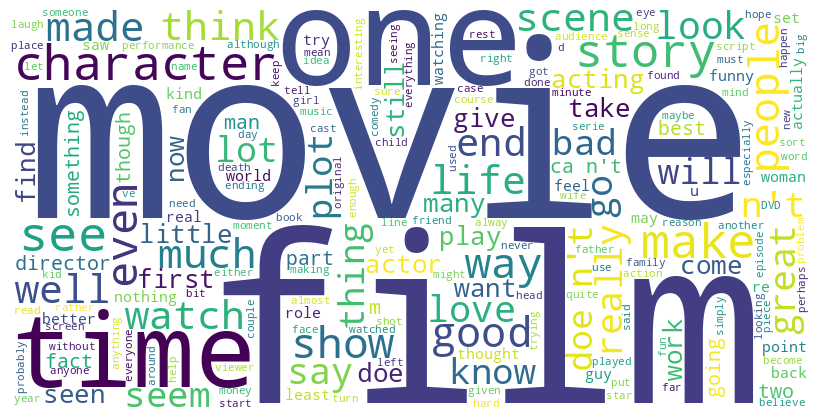

In [ ]:
# Une todos los textos lematizados
texto_lematizado = " ".join([texto for texto, _ in data_lematizada])

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["/><br", "the", "a", "and", "of", "to", "br", "wa", "ha", "s"])

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(texto_lematizado)

# Muestra la nube de palabras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Aplicamos el procesamiento a los datos
featuresets = [({"text": lemmatizar_texto(text)}, label) for (text, label) in data]
print(featuresets)

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
train_set, test_set = featuresets[:16], featuresets[16:]
print(train_set)
print(test_set)

[({'text': 'I love this movie'}, 'positive'), ({'text': 'This movie is terrible'}, 'negative'), ({'text': 'This movie is great'}, 'positive'), ({'text': 'I dislike this movie'}, 'negative'), ({'text': 'This film is amazing'}, 'positive'), ({'text': "I ca n't stand watching this movie"}, 'negative'), ({'text': 'The acting in this movie is phenomenal'}, 'positive'), ({'text': 'I regret wasting my time on this film'}, 'negative'), ({'text': 'I thoroughly enjoyed this movie'}, 'positive'), ({'text': 'This movie lack depth and substance'}, 'negative'), ({'text': 'The plot of this movie wa captivating'}, 'positive'), ({'text': 'I found the caracters in this film to be very engaging'}, 'positive'), ({'text': 'The special effect in this movie were impressive'}, 'positive'), ({'text': 'The storyline wa predictable and unoriginal'}, 'negative'), ({'text': 'I wa disappointed by the lack of character development'}, 'negative'), ({'text': 'The cinematography in this film wa stunning'}, 'positive')]

In [ ]:
# Entrenamos el clasificador
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
# Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 0.49998001039459483


In [ ]:
# Clasificamos un nuevo texto
new_text = "This movie is terrible"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "This movie is great"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "I dislike this movie"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

# Clasificamos un nuevo texto
new_text = "This film is amazing"
new_text_features = {"text": lemmatizar_texto(new_text)} # Wrap in a dictionary
predicted_label = classifier.classify(new_text_features)
print("Prediction:", predicted_label)

Prediction: positive
Prediction: positive
Prediction: positive
Prediction: positive


In [4]:
#  algoritmo de clasificación disponible en NLTK el clasificador de árboles de decisión
#!pip install nltk
import nltk
nltk.download('punkt')

#  algoritmo de clasificación disponible en NLTK el clasificador de árboles de decisión
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

# Asumo que 'data' es una lista de tuplas (comentario, etiqueta)
comentarios = [c for c, _ in data]
etiquetas = [e for _, e in data]

# Vectorizamos los comentarios usando TF-IDF
vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
X = vectorizer.fit_transform(comentarios)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, etiquetas, test_size=0.2, random_state=42)

# Creamos y entrenamos el clasificador de árboles de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluamos la precisión en el conjunto de prueba
accuracy = clf.score(X_test, y_test)
print("Precisión:", accuracy)

# Evaluamos la precisión en el conjunto de entrenamiento
accuracy = clf.score(X_train, y_train)
print("Precisión:", accuracy)

# Ejemplo de cómo clasificar un nuevo comentario
nuevo_comentario = "This movie is amazing"
nuevo_comentario_vectorizado = vectorizer.transform([nuevo_comentario])
prediccion = clf.predict(nuevo_comentario_vectorizado)
print("Predicción:", prediccion[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Precisión: 0.7138575282245979
Precisión: 1.0
Predicción: positive


{'precision': 0.9402344526127558, 'recall': 0.945645657647576, 'f1_score': 0.942932291874228}


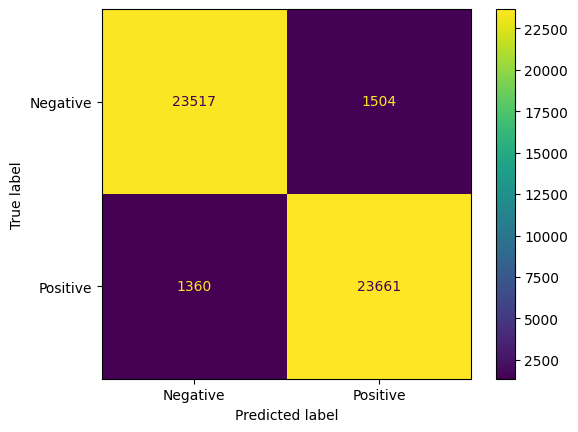

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

def calcular_metricas(y_true, y_pred):
    # Calcular métricas de evaluación
    precision = precision_score(y_true, y_pred, pos_label='positive')
    recall = recall_score(y_true, y_pred, pos_label='positive')
    f1 = f1_score(y_true, y_pred, pos_label='positive')

    return {'precision': precision, 'recall': recall, 'f1_score': f1}

# data es una lista de tuplas (texto, etiqueta) y classifier es el clasificador entrenado
y_true = [etiqueta for _, etiqueta in data]
y_pred = [clf.predict(vectorizer.transform([texto]))[0] for texto, _ in data]

metricas = calcular_metricas(y_true, y_pred)
print(metricas)

# Matriz de confusión y_true y y_pred son las etiquetas verdaderas y predichas, respectivamente
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

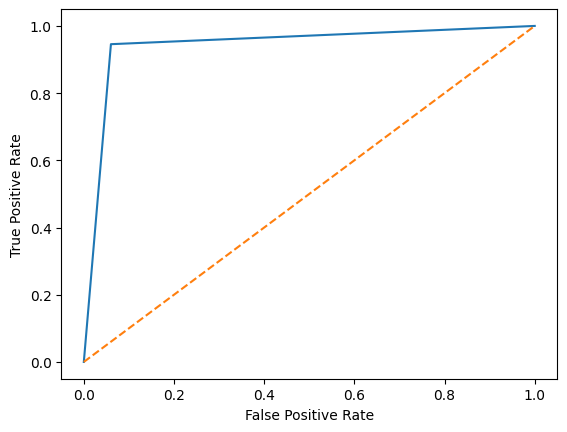

In [6]:
# Se obtienen las probabilidades de predicción para la clase positiva
y_probs = clf.predict_proba(vectorizer.transform([texto for texto, _ in data]))[:, 1]
# Se calculan los valores de FPR, TPR y umbrales
from sklearn.metrics import roc_curve
# Add pos_label here
fpr, tpr, thresholds = roc_curve(y_true, y_probs, pos_label='positive')
# Se crea la gráfica ROC
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt

In [7]:
#Gráfica de barras de errores
# Aplicamos el procesamiento a los datos
featuresets = [({"text": lemmatizar_texto(text)}, label) for (text, label) in data]
print(featuresets)
errores_positivos = []
errores_negativos = []

for i in range(len(y_true)):
  if y_true[i] == 'positive' and y_pred[i] == 'negative':
    errores_positivos.append(1)
  elif y_true[i] == 'negative' and y_pred[i] == 'positive':
    errores_negativos.append(1)

total_positivos = y_true.count('positive')
total_negativos = y_true.count('negative')

tasa_error_positivos = np.sum(errores_positivos) / total_positivos
tasa_error_negativos = np.sum(errores_negativos) / total_negativos

import matplotlib.pyplot as plt

plt.bar(['Positivo', 'Negativo'], [tasa_error_positivos, tasa_error_negativos])
plt.xlabel('Clase')
plt.ylabel('Tasa de Error')
plt.title('Errores en la Predicción por Clase')
plt.show()

NameError: name 'lemmatizar_texto' is not defined

In [ ]:
# Clasificador de máquinas de vectores de soporte (SVM)
# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

vectorizer = TfidfVectorizer(tokenizer=word_tokenize)
X = vectorizer.fit_transform([texto for texto, _ in data])
y = [etiqueta for _, etiqueta in data]

In [ ]:
# División de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Entrenamiento del clasificador SVM
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Evaluación del modelo
accuracy = clf.score(X_test, y_test)
print("Precisión:", accuracy)

In [ ]:
 # Calcular métricas de evaluación precision, recall, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

def calcular_metricas(y_true, y_pred):
    # Calcular métricas de evaluación
    precision = precision_score(y_true, y_pred, pos_label='positive')
    recall = recall_score(y_true, y_pred, pos_label='positive')
    f1 = f1_score(y_true, y_pred, pos_label='positive')

    return {'precision': precision, 'recall': recall, 'f1_score': f1}

# data es una lista de tuplas (texto, etiqueta) y classifier es el clasificador entrenado
y_true = [etiqueta for _, etiqueta in data]
y_pred = [clf.predict(vectorizer.transform([texto]))[0] for texto, _ in data]

metricas = calcular_metricas(y_true, y_pred)
print(metricas)

In [ ]:
# Matriz de Confusión
# Matriz de confusión y_true y y_pred son las etiquetas verdaderas y predichas, respectivamente
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()